## Imports

In [ ]:
from datetime import datetime
import numpy as np
import pickle
import json
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive/MyDrive/SPARSe

/content/gdrive/.shortcut-targets-by-id/1hNRRb9O7Y1kI_ulnKgi3KeD8eRwFsiwr/SPARSe


In [ ]:
train = pd.read_csv("Features_train3.csv")
train_labels = pd.read_csv("Labels_train3.csv")
test = pd.read_csv("Features_val3.csv")
test_labels = pd.read_csv("Labels_val3.csv")

In [ ]:
train = train.merge(train_labels, on="projectid")
train.drop(["Unnamed: 0_y", "Unnamed: 0_x", "projectid"], axis = 1, inplace = True)

In [ ]:
train_labels = train["is_fully_funded"].to_numpy()
train_features = train.drop(["is_fully_funded"], axis = 1).to_numpy()

In [ ]:
test = test.merge(test_labels, on="projectid")
test.drop(["Unnamed: 0_y", "Unnamed: 0_x", "projectid"], axis = 1, inplace = True)
test_labels = test_labels["is_fully_funded"].to_numpy()
test_features = test.drop(["is_fully_funded"], axis = 1).to_numpy()

In [ ]:
train_features.shape

(63627, 111)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_features, train_labels)

In [ ]:
test_predictions = classifier.predict(test_features)
accuracy = np.sum(test_predictions == test_labels)/len(test_predictions)

In [ ]:
accuracy

0.7681108205526892

In [ ]:
train_predictions = classifier.predict(train_features)
accuracy = np.sum(train_predictions == train_labels)/len(train_predictions)

In [ ]:
accuracy

0.813223945809169

In [ ]:
test_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.50000000e+00, 3.23908239e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.40966667e+01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.66575000e+01, 1.00000000e+00, 3.75000000e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97990000e+02, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.71759000e+03, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
results = np.concatenate([classifier.predict_proba(test_features), test_labels[:, np.newaxis]], axis = 1)
results = results[results[:, 1].argsort()]
np.mean((results[:results.shape[0]//10, 1] > 0.5) == (results[:results.shape[0]//10, 2] > 0.5))

0.572808671065033

In [ ]:
results = np.concatenate([classifier.predict_proba(train_features), train_labels[:, np.newaxis]], axis = 1)
results = results[results[:, 1].argsort()]
np.mean((results[:results.shape[0]//10, 1] > 0.5) == (results[:results.shape[0]//10, 2] > 0.5))

0.8792832442628105

In [ ]:
def precision(results, threshold):
  tp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  fp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] > 0.5))
  if tp+fp == 0:
    return 0.
  return tp/(tp + fp)
def recall(results, threshold):
  tp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  fn = np.sum((results[:results.shape[0]//10, 1] > threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  return tp/(tp + fn)

In [ ]:
results = np.concatenate([classifier.predict_proba(test_features), test_labels[:, np.newaxis]], axis = 1)
results = results[results[:, 1].argsort()]

In [ ]:
print(precision(results, 0.5))
print(recall(results, 0.5))

0.572808671065033
1.0


In [ ]:
import matplotlib.pyplot as plt
x = [i/100. for i in range(1, 101, 1)]
precision_vals = [precision(results,x_i) for x_i in x]
recall_vals = [recall(results,x_i) for x_i in x]

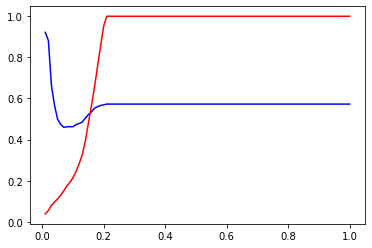

In [ ]:
plt.plot(x, precision_vals, "-b")
plt.plot(x, recall_vals, "-r")
plt.show()

In [ ]:
def poverty_rank(poverty_level, funding_frac_by_evaluation_date):
  if poverty_level == "moderate poverty":
    level = 0
  elif poverty_level == "high poverty":
    level = 1
  elif poverty_level == "low poverty":
    level = 2
  elif poverty_level == "highest poverty":
    level = 3
  return 100.0*level + funding_frac_by_evaluation_date

In [ ]:
train

,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,total_price_excluding_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,school_state_AK,school_state_AL,school_state_AR,school_state_AZ,school_state_CA,school_state_CO,school_state_CT,school_state_DC,school_state_DE,school_state_FL,school_state_GA,school_state_HI,school_state_IA,school_state_ID,school_state_IL,school_state_IN,school_state_KS,school_state_KY,school_state_LA,school_state_MA,school_state_MD,school_state_ME,school_state_MI,school_state_MN,school_state_MO,school_state_MS,school_state_MT,school_state_NC,school_state_ND,school_state_NE,school_state_NH,school_state_NJ,school_state_NM,school_state_NV,school_state_NY,school_state_OH,school_state_OK,school_state_OR,school_state_PA,school_state_RI,school_state_SC,school_state_SD,school_state_TN,school_state_TX,school_state_UT,school_state_VA,school_state_VT,school_state_WA,school_state_WI,school_state_WV,school_state_WY,school_metro_missing,school_metro_rural,school_metro_suburban,school_metro_urban,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mr. & Mrs.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_missing,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_area_missing,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,secondary_focus_area_missing,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_missing,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,grade_level_missing,total_number_of_donations,total_value_of_donations,num_promo_matched,avg_value_per_donation,total_prop_funded,prop_promo_matched,is_fully_funded
0,0,0,0,0,0,0,0,0,1074.42,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.00,0.0,0.000000,0.000000,0.000000,1
1,0,0,0,0,0,0,0,0,198.43,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0.0,0.000000,0.000000,0.000000,0
2,0,0,0,0,0,0,0,0,231.98,18.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,5,231.98,2.0,46.396000,1.000000,0.400000,1
3,0,0,0,0,0,0,0,0,299.59,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,299.59,0.0,299.590000,1.000000,0.000000,1
4,1,0,0,0,1,0,0,0,383.22,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,7,383.22,1.0,54.745714,1.000000,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
def precision(results, threshold):
  tp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  fp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] > 0.5))
  if tp+fp == 0:
    return 0.
  return tp/(tp + fp)
def recall(results, threshold):
  tp = np.sum((results[:results.shape[0]//10, 1] < threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  fn = np.sum((results[:results.shape[0]//10, 1] > threshold) * (results[:results.shape[0]//10, 2] < 0.5))
  return tp/(tp + fn)

In [ ]:
results = test[["total_prop_funded", "total_prop_funded", "is_fully_funded"]].to_numpy()
results = results[results[:, 1].argsort()]
results[:, 1] = np.arange(0, results.shape[0], 1)/(results.shape[0]/10.)
import matplotlib.pyplot as plt
x = [i/100. for i in range(1, 101, 1)]
precision_vals = [precision(results,x_i) for x_i in x]
recall_vals = [recall(results,x_i) for x_i in x]

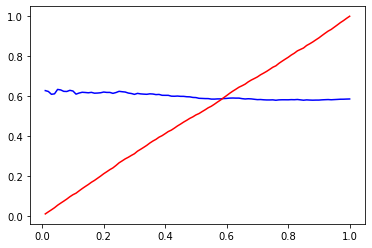

In [ ]:
plt.plot(x, precision_vals, "-b")
plt.plot(x, recall_vals, "-r")
plt.show()